In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [510]:
random.random()

0.4168270614359558

In [634]:
def read_csv(data_number, shape=2):
    if shape==2:
        df1 = pd.read_csv(f'data{data_number}.csv', header= None, names=['X','Y'])
    else:
        df1 = pd.read_csv(f'data{data_number}.csv', header= None)

    return df1

In [650]:
def make_centers(c, df, shape):
    centers = []
    if shape==2:
        for i in range(c):
            x = random.random()
            y = random.random()
            centers.append(Point(x*int(max(df.X)+1),y*int(max(df.Y))+1))
    if shape==3:
        for i in range(c):
            x = random.random()
            y = random.random()
            w = random.random()
            centers.append(Point(x*int(max(df[0])+1),y*int(max(df[1]))+1,w*int(max(df[2]))+1))
    if shape==4:
        for i in range(c):
            x = random.random()
            y = random.random()
            w = random.random()
            z = random.random()
            centers.append(Point(x*int(max(df[0])+1),y*int(max(df[1]))+1,w*int(max(df[2]))+1,z*int(max(df[3]))+1))
    return centers

In [615]:
def calculate_u(point: Point,centers,m, shape=2):
    uk = [0]*len(centers)
    for i in range(len(centers)):
        if point.x==centers[i].x and point.y == centers[i].y and point.w == centers[i].w and point.z == centers[i].z:
            uk = [0]*len(centers)
            uk[i] = 1
            return uk
        else:
            sigma = 0
            for j in range(len(centers)):
                sigma += (calculate_dis(point, centers[i],shape) / calculate_dis(point, centers[j], shape)) ** (2/(m-1))
            uk[i] = 1/sigma
    return uk

In [616]:
def calculate_dis(point1, point2, shape=2):
    if shape==2:
        distance = ((point1.x-point2.x)**2 + (point1.y-point2.y)**2)**0.5
    elif shape==3:
        distance = ((point1.x-point2.x)**2 + (point1.y-point2.y)**2 + (point1.w-point2.w)**2) **0.5
    elif shape==4:
        distance = ((point1.x-point2.x)**2 + (point1.y-point2.y)**2 + (point1.w-point2.w)**2 + (point1.w-point2.w)**2) **0.5

    return distance

In [617]:
class Point:
    def __init__(self, x, y,w=-1,z=-1):
        self.x = x
        self.y = y
        self.w = w
        self.z = z
        self.uk = []
        self.c = 0
        self.cluster = 0
    def print(self):
        print(self.x, self.y, self.cluster)

In [618]:
def make_points(df, centers, m,shape = 2):
    points = []
    if shape==2:
        for i in range(len(df)):
            temp_point = Point(df.X[i],df.Y[i])
            temp_point.uk = calculate_u(temp_point, centers, m)
            temp_point.c = max(temp_point.uk)
            temp_point.cluster = np.argmax(temp_point.uk)
            points.append(temp_point)
    elif shape==3:
        for i in range(len(df)):
            temp_point = Point(df[0][i],df[1][i],df[2][i])
            temp_point.uk = calculate_u(temp_point, centers, m,shape)
            temp_point.c = max(temp_point.uk)
            temp_point.cluster = np.argmax(temp_point.uk)
            points.append(temp_point)
    elif shape==4:
        for i in range(len(df)):
            temp_point = Point(df[0][i],df[1][i],df[2][i],df[3][i])
            temp_point.uk = calculate_u(temp_point, centers, m,shape)
            temp_point.c = max(temp_point.uk)
            temp_point.cluster = np.argmax(temp_point.uk)
            points.append(temp_point)
    return points

In [619]:
def clustering(points, centers, m, shape):
    for j in tqdm(range(100)):
        for i in range(len(centers)):
            c = Point(0,0)
            d = 0
            for point in points:
                c.x += (((point.uk[i])**m) * point.x)
                c.y += (((point.uk[i])**m) * point.y)
                if shape>2:
                    c.w += (((point.uk[i])**m) * point.w)
                if shape>3:
                    c.z += (((point.uk[i])**m) * point.z)
                d += point.uk[i]**m
            c.x/=d
            c.y/=d
            if shape>2:
                c.w/=d
            if shape>3:
                c.z/=d
            centers[i] = c
        for point in points:
            point.uk = calculate_u(point, centers, m)
            point.c = max(point.uk)
            point.cluster = np.argmax(point.uk)
    return points, centers


In [620]:
def calculate_cost(points, centers, m, shape):
    cost = 0
    for point in points:
        for center in centers:
            cost += calculate_dis(point,center,shape)**2 * point.uk[centers.index(center)]**m
    return cost

In [640]:
def get_points(number_of_clusters, data_number, m, shape):
    df = read_csv(data_number, shape)
    centers = make_centers(number_of_clusters, df, shape)
    points = make_points(df, centers, m, shape)
    points, centers = clustering(points, centers, m, shape)
    x_s = []
    y_s = []
    w_s = []
    z_s = []
    clusters = []
    cost = calculate_cost(points, centers, m, shape)
    all_points = points + centers
    for point in all_points:
        x_s.append(point.x)
        y_s.append(point.y)
        if shape>2:
            w_s.append(point.w)
        if shape>3:
            z_s.append(point.z)
        if point in centers:
            clusters.append(-2)
        else:
            clusters.append(point.cluster*point.c)
    return x_s, y_s, clusters, cost

In [623]:
x_s, y_s, clusters, cost = get_points(5, 1, 5,2)

100%|██████████| 100/100 [00:11<00:00,  8.89it/s]


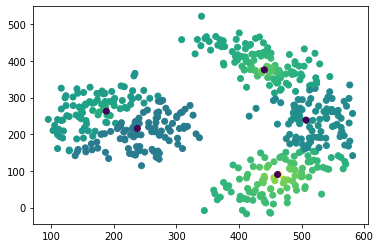

In [624]:
plt.scatter(x_s,y_s,c = clusters)

100%|██████████| 100/100 [00:08<00:00, 12.38it/s]


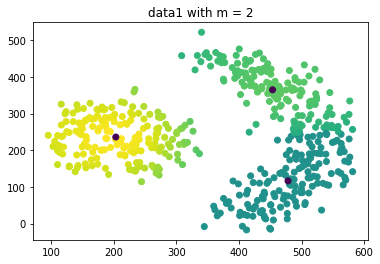

100%|██████████| 100/100 [00:07<00:00, 13.14it/s]


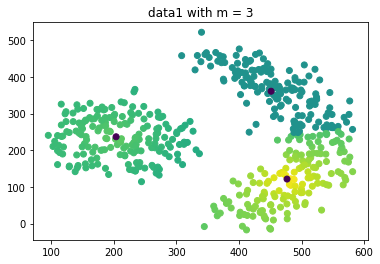

100%|██████████| 100/100 [00:07<00:00, 12.94it/s]


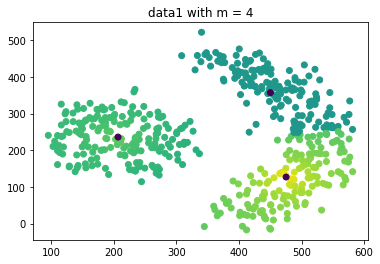

100%|██████████| 100/100 [00:08<00:00, 11.39it/s]


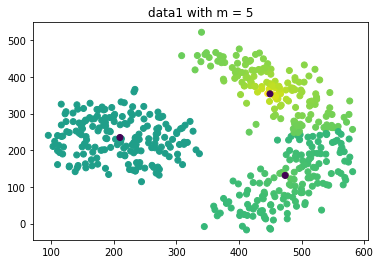

100%|██████████| 100/100 [00:09<00:00, 10.43it/s]


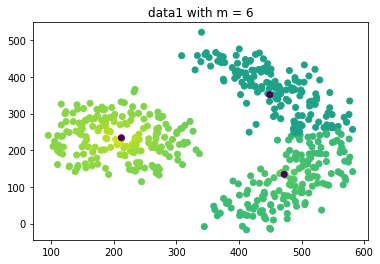

In [626]:
costs = []
for i in range(2,7):
    x_s, y_s, clusters, cost = get_points(3,1,i,2)
    plt.scatter(x_s,y_s,c = clusters)
    plt.title(f"data{1} with m = {i}")
    plt.show()
    costs.append(cost)

100%|██████████| 100/100 [00:01<00:00, 71.92it/s]


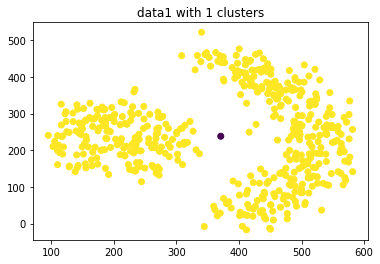

100%|██████████| 100/100 [00:04<00:00, 23.42it/s]


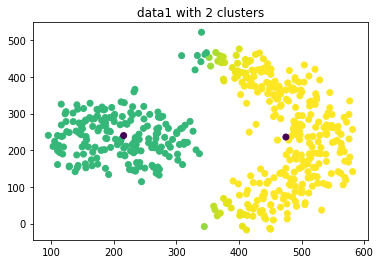

100%|██████████| 100/100 [00:06<00:00, 15.55it/s]


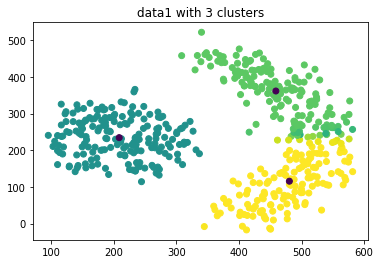

100%|██████████| 100/100 [00:08<00:00, 12.44it/s]


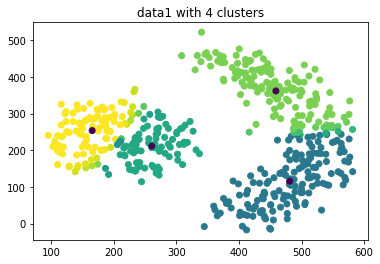

100%|██████████| 100/100 [00:13<00:00,  7.39it/s]


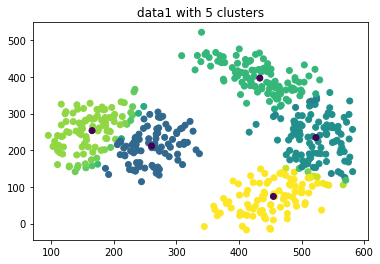

In [628]:
costs = []
for i in range(1,6):
    x_s, y_s, clusters, cost = get_points(i,1,1.2,2)
    plt.scatter(x_s,y_s,c = clusters)
    plt.title(f"data1 with {i} clusters")
    plt.show()
    costs.append(cost)

Text(0, 0.5, 'Cost')

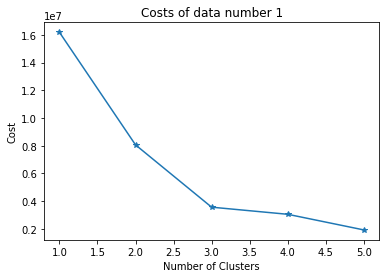

In [630]:
plt.plot(range(1,6), costs, marker='*')
plt.title("Costs of data number 1")
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

100%|██████████| 100/100 [00:09<00:00, 10.86it/s]


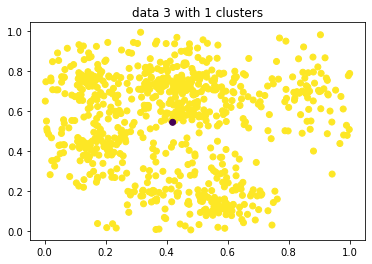

100%|██████████| 100/100 [00:18<00:00,  5.38it/s]


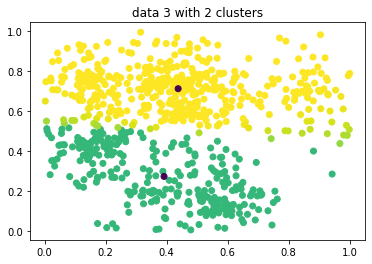

100%|██████████| 100/100 [00:29<00:00,  3.41it/s]


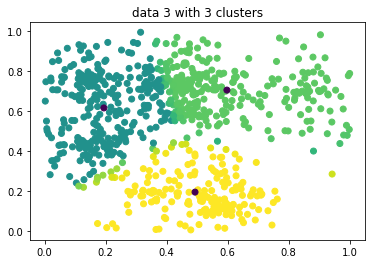

100%|██████████| 100/100 [00:44<00:00,  2.26it/s]


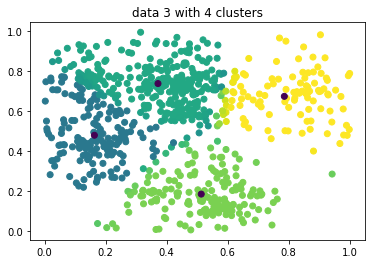

100%|██████████| 100/100 [00:24<00:00,  4.08it/s]


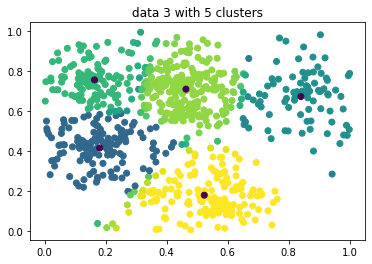

In [631]:
costs = []
for i in range(1,6):
    x_s, y_s, clusters, cost = get_points(i,3,1.2,2)
    plt.scatter(x_s,y_s,c = clusters)
    plt.title(f"data 3 with {i} clusters")
    plt.show()
    costs.append(cost)

Text(0, 0.5, 'Cost')

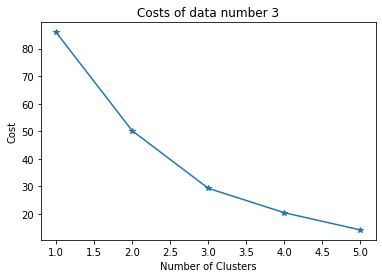

In [632]:
plt.plot(range(1,6), costs, marker='*')
plt.title("Costs of data number 3")
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

In [653]:
costs = []
for i in range(1,6):
    x_s, y_s, clusters, cost = get_points(i,2,1.2,4)
    costs.append(cost)

100%|██████████| 100/100 [00:23<00:00,  4.30it/s]


Text(0, 0.5, 'Cost')

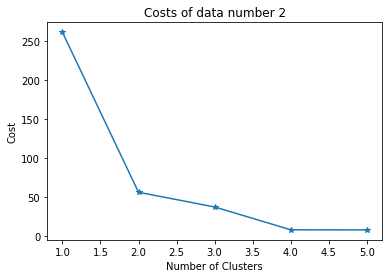

In [654]:
plt.plot(range(1,6), costs, marker='*')
plt.title("Costs of data number 2")
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

In [655]:
costs = []
for i in range(1,6):
    x_s, y_s, clusters, cost = get_points(i,4,1.2,3)
    costs.append(cost)

100%|██████████| 100/100 [00:08<00:00, 11.96it/s]


Text(0, 0.5, 'Cost')

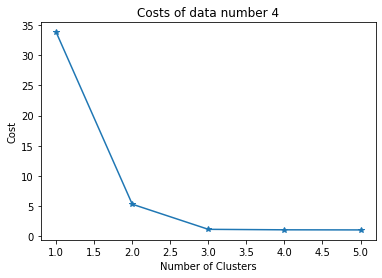

In [656]:
plt.plot(range(1,6), costs, marker='*')
plt.title("Costs of data number 4")
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")